In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import sys 
from utils.plot import plot_stroke
from utils.data_generator import DataGenerator
from utils.data_utils import convert_one_hot_encoding_to_sentence, get_standard_normalization_params

sys.path.insert(0,'..')

strokes_file_path = './data/strokes.npy'
labels_file_path = './data/sentences.txt'
batch_size = 30
max_num_of_chars = 14
sequence_length = 200

In [2]:
datagen = DataGenerator(strokes_file_path=strokes_file_path, labels_file_path=labels_file_path)

In [3]:
x_values = []
for sentence in datagen.raw_strokes:
    x_values.extend(sentence[:, 1])
print('x std: ', np.std(x_values))
print('x mean: ', np.mean(x_values))

x std:  2.0786476
x mean:  0.41248125


In [4]:
y_values = []
for sentence in datagen.raw_strokes:
    y_values.extend(sentence[:, 2])
print('y std: ', np.std(y_values))
print('y mean: ', np.mean(y_values))

y std:  1.8560573
y mean:  -0.006003161


In [5]:
batch_generator_unconditional, validation_set_unconditional = datagen.generate_unconditional_dataset(
                                                                batch_size=batch_size,
                                                                sequence_length=sequence_length)

In [6]:
batch_generator_conditional, validation_set_conditional = datagen.generate_conditional_dataset(
                                                            batch_size=batch_size,
                                                            max_num_of_chars=max_num_of_chars,
                                                            sequence_length=sequence_length)

In [7]:
stokes_t_un, target_un = next(validation_set_unconditional)
stokes_t_c, target_c, sentences_input = next(validation_set_conditional)

In [8]:
#looking at the processed data
print(np.shape(stokes_t_un))

(30, 200, 3)


In [9]:
x_mean, x_std, y_mean, y_std = get_standard_normalization_params()
stokes_t_c[:, :, 1] = (stokes_t_c[:, :, 1] * x_std) + x_mean
stokes_t_c[:, :, 2] = (stokes_t_c[:, :, 2] * y_std) + y_mean

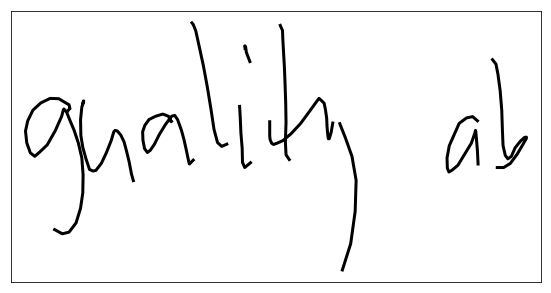

In [49]:
plot_stroke(stokes_t_c[3, :, :])

In [50]:
# print(stokes_t_c[20, :, :])
sentence = stokes_t_c[3, :, :]
print(len(sentence[np.where(sentence[:, 0] == 1.)]))

12


In [51]:
convert_one_hot_encoding_to_sentence(datagen.alphabet, sentences_input[3])

'quality about '

In [12]:
lengths = []
for i in range(len(datagen.train_sentences)):
    lengths.append(len(datagen.train_sentences[i]))

In [13]:
print(np.max(lengths))
print(np.min(lengths))
print(np.mean(lengths))

65
9
30.667083333333334
